In [1]:
import pandas as pd
import numpy as np
from math import pi

import matplotlib.pyplot as plt
import seaborn as sns
import bokeh

In [2]:
file = pd.read_csv('NFL_stats.csv')

C:\Users\Andres\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# getting copy 
bar_teams = file.copy()
bar_stats = file.copy()

display(file.shape,file.columns, file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509762 entries, 0 to 509761
Data columns (total 49 columns):
GameId                    509762 non-null int64
PlayId                    509762 non-null int64
Team                      509762 non-null object
X                         509762 non-null float64
Y                         509762 non-null float64
S                         509762 non-null float64
A                         509762 non-null float64
Dis                       509762 non-null float64
Orientation               509744 non-null float64
Dir                       509748 non-null float64
NflId                     509762 non-null int64
DisplayName               509762 non-null object
JerseyNumber              509762 non-null int64
Season                    509762 non-null int64
YardLine                  509762 non-null int64
Quarter                   509762 non-null int64
GameClock                 509762 non-null object
PossessionTeam            509762 non-null object
Down   

(509762, 49)

Index(['GameId', 'PlayId', 'Team', 'X', 'Y', 'S', 'A', 'Dis', 'Orientation',
       'Dir', 'NflId', 'DisplayName', 'JerseyNumber', 'Season', 'YardLine',
       'Quarter', 'GameClock', 'PossessionTeam', 'Down', 'Distance',
       'FieldPosition', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay',
       'NflIdRusher', 'OffenseFormation', 'OffensePersonnel',
       'DefendersInTheBox', 'DefensePersonnel', 'PlayDirection', 'TimeHandoff',
       'TimeSnap', 'Yards', 'PlayerHeight', 'PlayerWeight', 'PlayerBirthDate',
       'PlayerCollegeName', 'Position', 'HomeTeamAbbr', 'VisitorTeamAbbr',
       'Week', 'Stadium', 'Location', 'StadiumType', 'Turf', 'GameWeather',
       'Temperature', 'Humidity', 'WindSpeed', 'WindDirection'],
      dtype='object')

None

In [4]:
file.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW


In [5]:
# DROP 
drop = ['GameId', 'PlayId', 'X', 'Y', 'S', 'A', 'Dis', 'Orientation',
        'Dir', 'NflId', 'DisplayName', 'JerseyNumber', 'Down', 'Distance',
       'FieldPosition', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay',
       'NflIdRusher', 'OffenseFormation', 'OffensePersonnel',
       'DefendersInTheBox', 'DefensePersonnel', 'PlayDirection', 'TimeHandoff', 'StadiumType', 'Turf', 'GameWeather',
       'Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'HomeTeamAbbr', 'VisitorTeamAbbr']
bar_teams = bar_teams.drop(drop, axis=1)


In [7]:
Stadia = bar_teams.Stadium.unique().tolist()
Teams = bar_teams.PossessionTeam.unique().tolist()

In [8]:
bar_teams.Team = bar_teams.Team.astype(str).str.replace('away', '-1')
bar_teams.Team = bar_teams.Team.astype(str).str.replace('home', '1')

In [113]:
bar_teams['Count'] = 1
teams_df = bar_teams[['Count', 'PossessionTeam']]
team_grouped = teams_df.groupby(by='PossessionTeam').count()

In [97]:
team_grouped = team_grouped.sort_values('Count')
champion = team_grouped.loc[team_grouped.index == 'NE']
subchamp = team_grouped.loc[team_grouped.index == 'PHI']

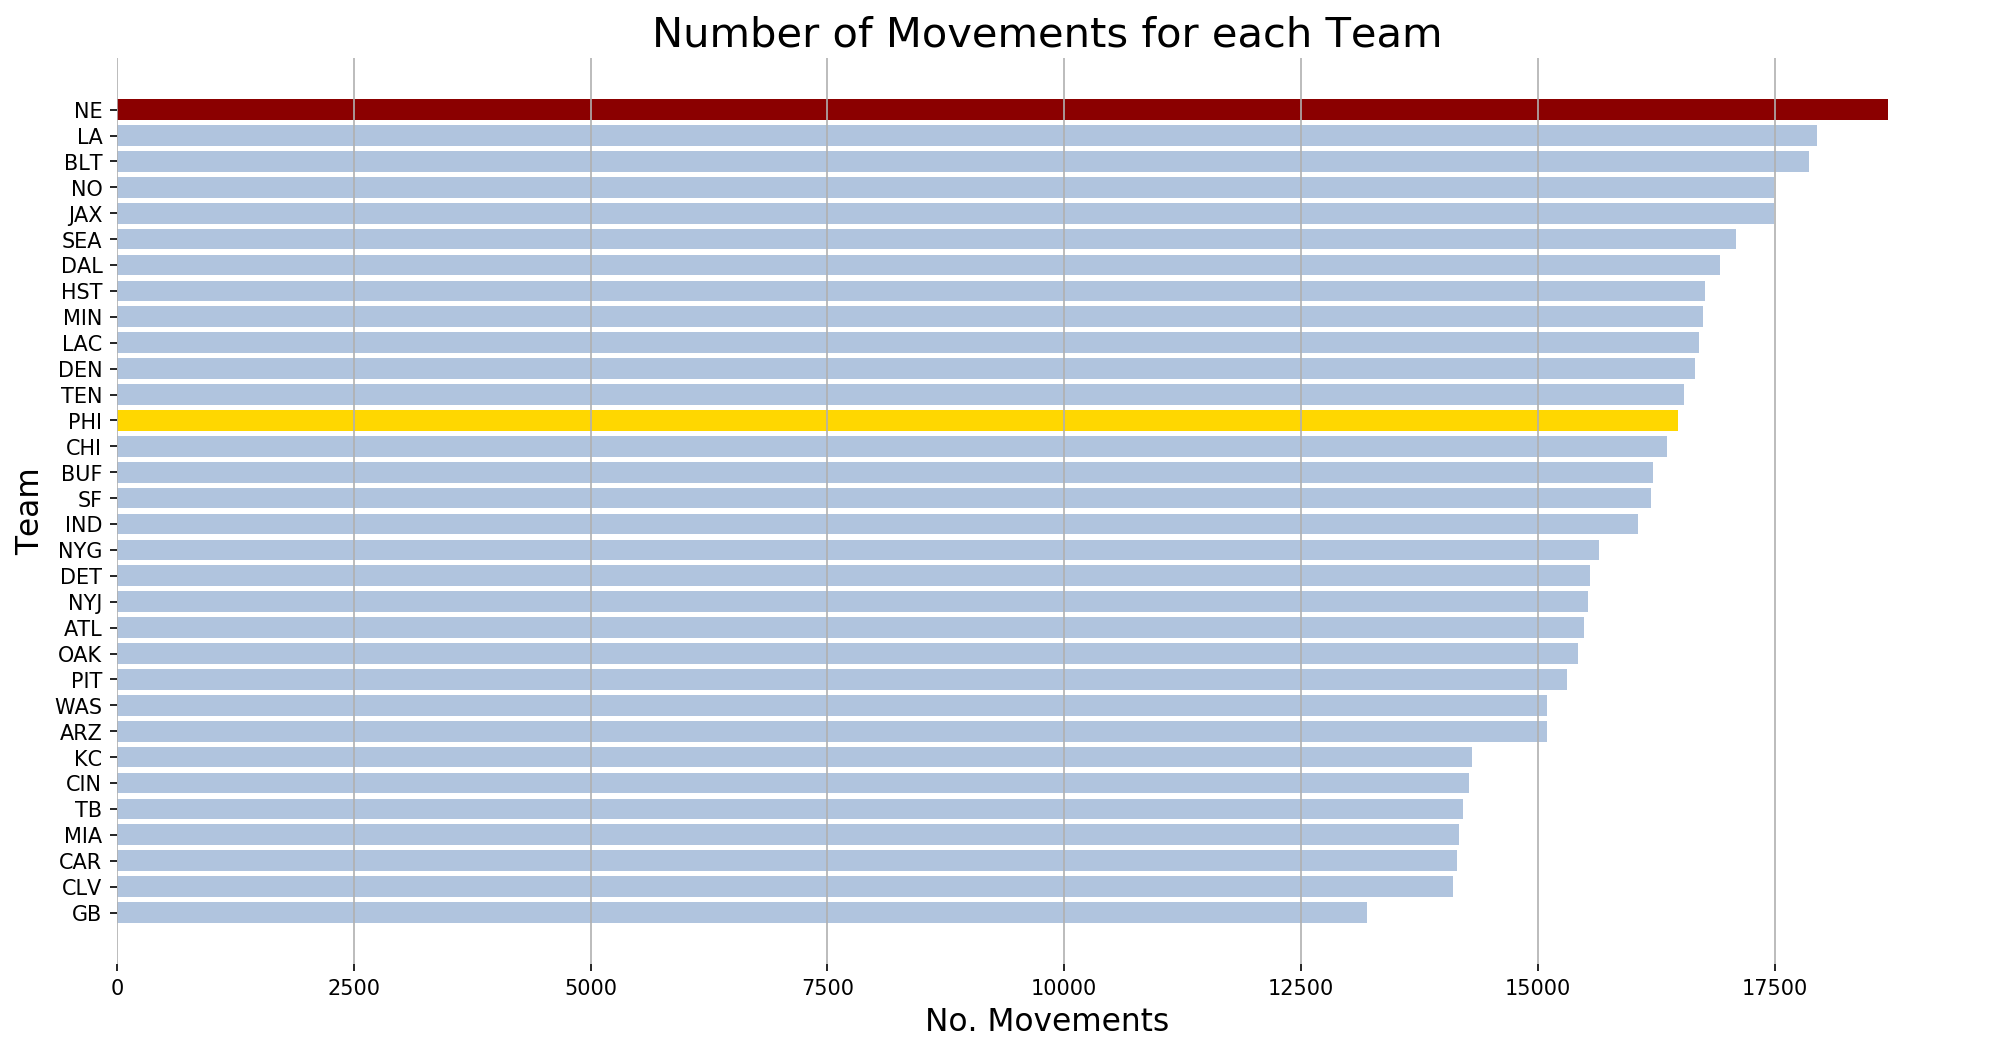

In [108]:
plt.figure(figsize = [16, 8], dpi = 150)
ax = plt.axes()

plt.barh(team_grouped.index, team_grouped.Count, color = 'lightsteelblue')
plt.barh(champion.index, champion.Count, color = 'darkred')
plt.barh(subchamp.index, subchamp.Count, color = 'gold')

plt.title('Number of Movements for each Team', fontsize = 20)
plt.xlabel('No. Movements', fontsize=15)
plt.ylabel('Team', fontsize=15)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(axis='x')


plt.show()

In [17]:
def per_match(df, game_id):
    df_master = df.copy()
    df_master = df_master.loc[df_master.GameId.astype(str) == game_id]
    
    df_1 = df_master.loc[df_master.Quarter == 1]
    df_2 = df_master.loc[df_master.Quarter == 2]
    df_3 = df_master.loc[df_master.Quarter == 3]
    df_4 = df_master.loc[df_master.Quarter == 4]
    df_all = [df_1,df_2,df_3,df_4]
    
    df_1 = df_1.groupby(by = 'PossessionTeam').count()
    df_2 = df_2.groupby(by = 'PossessionTeam').count()
    df_3 = df_3.groupby(by = 'PossessionTeam').count()
    df_4 = df_4.groupby(by = 'PossessionTeam').count()
    
    df_all = [df_1,df_2,df_3,df_4]

    
    df_gouped = df_master.groupby(by='Quarter').count()
    
    ret = [df_all, df_gouped]
    return ret

In [18]:
bar_stats['Count'] = 1
match = '2017090700'

In [19]:
test = per_match(bar_stats, match)

In [35]:
test[1].index.astype(str)

Index(['1', '2', '3', '4'], dtype='object', name='Quarter')

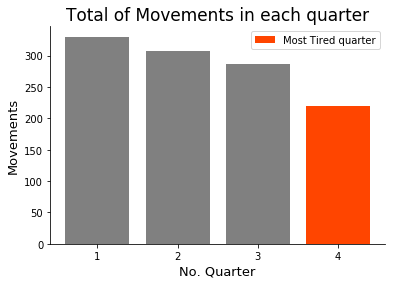

In [59]:
ax = plt.axes()

tired_4 = test[1].index.astype(str).tolist()
tired_count = test[1].Count.tolist()

plt.bar(test[1].index.astype(str), test[1].Count, color='grey')
plt.bar(tired_4[3], tired_count[3], color='orangered', label='Most Tired quarter')

plt.title('Total of Movements in each quarter', fontsize = 17)
plt.xlabel('No. Quarter', fontsize = 13)
plt.ylabel('Movements', fontsize=13)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.legend()
plt.show()

In [18]:
test[0][0]

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection,Count
PossessionTeam,,,,,,,,,,,,,,,,,,,,,
KC,88,88,88,88,88,88,88,88,88,88,...,88,88,88,88,88,88,88,88,88,88
NE,242,242,242,242,242,242,242,242,242,242,...,242,242,242,242,242,242,242,242,242,242


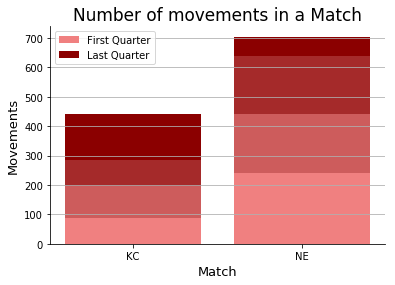

In [107]:
ax = plt.axes()

plt.bar(test[0][0].index, test[0][0].Count, color='lightcoral', label = 'First Quarter')
plt.bar(test[0][1].index, test[0][1].Count, bottom = test[0][0].Count, color='indianred')
plt.bar(test[0][2].index, test[0][2].Count, bottom = test[0][0].Count+ test[0][1].Count, 
        color = 'brown')
plt.bar(test[0][3].index, test[0][3].Count, bottom = test[0][0].Count+ test[0][1].Count+test[0][2].Count, 
        color = 'darkred', label = 'Last Quarter')

plt.title('Number of movements in a Match', fontsize = 17)
plt.ylabel('Movements', fontsize = 13)
plt.xlabel('Match', fontsize = 13)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.grid(axis = 'y')
plt.legend()
plt.show()

In [70]:
temperature = file.copy()
band_tag = file.GameWeather.unique()
band_x = file.copy()

In [112]:
temperature_min = temperature.Temperature.min() 
temperature_max = temperature.Temperature.max()
#display(temperature_min, temperature_max)

In [72]:
# Defining Parameters
intervals = [int(temperature_min), 60, 82,int(temperature_max)]
labels = labels = ['Cold', 'Room', 'Hot']

# Creating Intervals
temperature["Temp_std"] = pd.cut(temperature.Temperature.fillna(temperature.Temperature.mean()), intervals, labels = labels)


In [111]:
values = temperature.groupby(by='Temp_std').mean()
values_2 = temperature.groupby(by='Temp_std').count()

#display(values.index.tolist() ,values.Temperature.astype(int).tolist(), values.Humidity.tolist(), values_2, values)

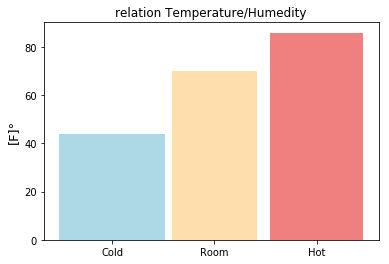

In [110]:
#### Make fake dataset
height = values.Humidity.tolist() 
bars = ['Cold', 'Room', 'Hot']
# Choose the width of each bar and their positions
width = values.Temperature.astype(int).tolist()
#width = values_2.Temperature.astype(int).tolist()

y_pos = [0,60,120]
 
# Make the plot
plt.bar(y_pos, width, width=height, color = ['lightblue', 'navajowhite','lightcoral'])
plt.xticks(y_pos, bars)


plt.title('relation Temperature/Humedity')
plt.ylabel('[F]°', fontsize = 13)

plt.show()

In [79]:
file.columns

Index(['GameId', 'PlayId', 'Team', 'X', 'Y', 'S', 'A', 'Dis', 'Orientation',
       'Dir', 'NflId', 'DisplayName', 'JerseyNumber', 'Season', 'YardLine',
       'Quarter', 'GameClock', 'PossessionTeam', 'Down', 'Distance',
       'FieldPosition', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay',
       'NflIdRusher', 'OffenseFormation', 'OffensePersonnel',
       'DefendersInTheBox', 'DefensePersonnel', 'PlayDirection', 'TimeHandoff',
       'TimeSnap', 'Yards', 'PlayerHeight', 'PlayerWeight', 'PlayerBirthDate',
       'PlayerCollegeName', 'Position', 'HomeTeamAbbr', 'VisitorTeamAbbr',
       'Week', 'Stadium', 'Location', 'StadiumType', 'Turf', 'GameWeather',
       'Temperature', 'Humidity', 'WindSpeed', 'WindDirection'],
      dtype='object')

In [80]:
enviroment_stat = file.copy()
drop_lab = [ 'X', 'Y', 'S', 'A', 'Dis', 'Orientation',
       'Dir','PlayerWeight', 'PlayerBirthDate',
       'PlayerCollegeName', 'Position', 'HomeTeamAbbr', 'VisitorTeamAbbr',
       'Week', 'Stadium', 'Location', 'StadiumType', 'Turf', 'GameWeather',
       'Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'PlayerWeight', 'PlayerBirthDate',
       'PlayerCollegeName', 'Position', 'HomeTeamAbbr', 'VisitorTeamAbbr',
       'Week', 'Stadium', 'Location', 'StadiumType', 'Turf', 'GameWeather',
       'Temperature', 'Humidity', 'WindSpeed', 'WindDirection','JerseyNumber','NflId', 'DisplayName', 'Team',
        'DisplayName', 'DefensePersonnel', 'DefendersInTheBox', 'OffenseFormation']
enviroment_stat = enviroment_stat.drop(drop_lab, axis=1)

In [81]:
time_group = enviroment_stat.groupby('TimeSnap').sum()
time_group.index = time_group.index.astype(str).str.slice(11,19)
time_group.head()

,GameId,PlayId,Season,YardLine,Quarter,Down,Distance,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,Yards
TimeSnap,,,,,,,,,,,
00:44:05,44375995400,443759954002596,44374,770,22,66,44,0,0,55963006,176
00:44:26,44375995400,443759954003058,44374,946,22,22,220,0,0,55963006,66
00:45:15,44375995400,443759954004158,44374,770,22,22,220,0,0,55963006,110
00:48:39,44375995400,443759954007590,44374,44,22,44,44,0,0,55872586,44
00:53:13,44375995400,443759954008690,44374,550,22,22,220,154,0,56274174,154


In [82]:
match_df = time_group.loc[time_group.GameId == 44398706242]

In [83]:
def Time_Match(df, game_id):
    match_df = df.loc[df.GameId == game_id]
    match_df

<function matplotlib.pyplot.show(*args, **kw)>

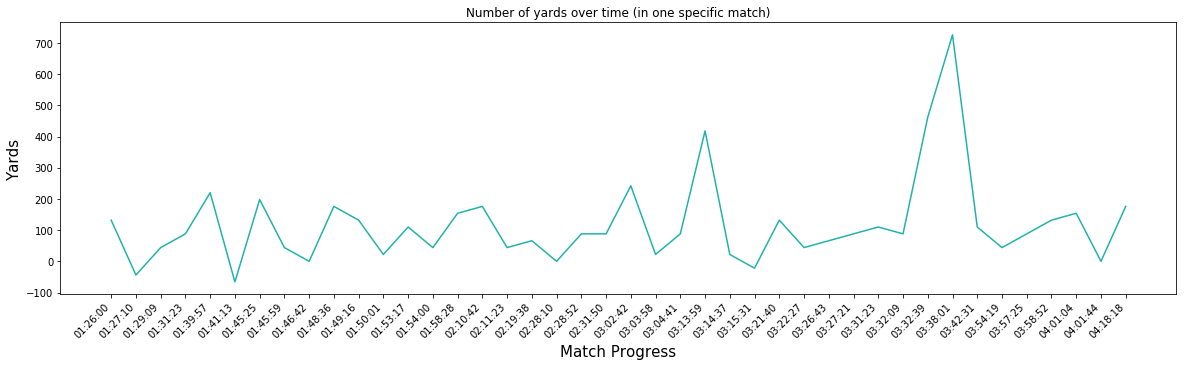

In [121]:
plt.figure(figsize = [20,5])
plt.plot(match_df.index, match_df.Yards, color = 'lightseagreen', )
plt.xticks(rotation=45, ha="right")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlabel('Match Progress', fontsize=15)
plt.ylabel('Yards', fontsize = 15)
plt.title('Number of yards over time (in one specific match)')

plt.show